## Introduction ##
In response to the ongoing opioid crisis, effective treatment programs are critical for helping individuals achieve and sustain recovery. In this project, **our aim is to develop a Methadone Mainteinance Treatment Program, using Python, designed specifically for clinicians as the end-users to assist those struggling with Opioid Use Disorder (OUD).**

* OUD is a substance use disorder, sometimes referred to as "opioid abuse or dependence" or "opioid addiction" and is a problematic pattern of opioid use that causes significant impairment or distress. It is a treatable, chronic disease that can affect anyone – regardless of race, gender, income level, or social class.

* Methadone is a long-acting, synthetic opioid agonist and is widely used for its effectiveness in eliminating withdrawal symptoms and relieving drug cravings. It works by acting on the same opioid receptors that other opioids activate. Examples of other opioids include: heroin, morphine, codeine, fentanyl, oxycodone. 

* In the program, patients work with their clinicians to gradually reduce and/or maintain their methadone dosage that effectively prevents withdrawal. 

* Our program will serve as a tool to collect and organize patient information into a secure database, track methadone dosages, previous opioid type, duration of previous opioid use, and measure both patient retention rates and overall effectiveness of the treatment. 

* By using tools like NumPy and Pandas, our program will analyze trends and correlations in the collected data, providing valuable insights that can assist clinicians in making treatment decisions and improve patient outcomes. We will focus on patient retention rate as dropout from maintenance programs places patients in high risk of relapse. Although relapse is a normal step in recovery, it may be life-threatening due to increased risk for a fatal overdose. 

This project not only enhances the clinical management of OUD but also contributes to the large effort of addressing the opioid pandemic.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline 

### Collection and organization of patient information

In [ ]:
# Empty Patient Record list to store inputted patient information as the dictionaries 
patient_record = []

In [ ]:
# Function for Enter Patient Information
def enter_patient_info():
    # Prompts user for input
    print("\nEnter Patient Information:")
    date_of_service = input("Date of Service (MM-DD-YYYY): ")
    patient_id = input("Patient ID#: ")
    name = input("Name: ").lower()
    sex = input("Sex (m/f): ").lower()
    age = int(input("Age: "))
    race = input("Race/Ethnicity: ").lower()
    prev_opioid_type = input("Previous Opioid Use Type: ").lower()
    duration_previous_opioid_use = input("Duration of Previous Opioid Use (years): ")
    methadone_dose_mg = float(input("Methadone Dose (mg): "))
    
    # Adding inputs to dictionary
    patient_info = {
        "patient_id" : patient_id,
        "name" : name,
        "sex" : sex,
        "age" : age,
        "race" : race,
        "prev_opioid_type" : prev_opioid_type,
        "duration_previous_opioid_use" : duration_previous_opioid_use,
        "date_of_service" : date_of_service,
        "methadone_dose_mg" : methadone_dose_mg
    }
    patient_record.append(patient_info)
    print("\nPatient {} information is added/updated successfully.".format(name))  # need to put before return in order to print
    return

In [ ]:
# Function to append patient's methadone dose and date of service
def update_methadone_dose():
    # Prompts user for input 
    patient_id = input("\nEnter Patient ID: ")
    new_date = input("Enter Date of Service (MM-DD-YYYY): ")
    new_dose = float(input("Enter Methadone Dose (mg): "))
    
    # Makes sure dose is written as a float
    try:
        new_dose = float(new_dose)
    except ValueError:
        print("\nInvalid dose entered. Please enter a numeric value.")
        return
    
    # Finds patient record
    patient_found = False
    for record in patient_record:
        if record["patient_id"] == patient_id:
            patient_found = True
            
            # 'Date of service' and 'methadone dose' are lists
            if not isinstance(record["date_of_service"], list):
                record["date_of_service"] = [record["date_of_service"]]
            if not isinstance(record["methadone_dose_mg"], list):
                record["methadone_dose_mg"] = [record["methadone_dose_mg"]]
            
            # To append new date and dose
            record["date_of_service"].append(new_date)
            record["methadone_dose_mg"].append(new_dose)
            print(f"\nPatient ID {patient_id} updated successfully.")
            break
    
    if not patient_found:
        print(f"\nPatient ID {patient_id} not found.")

In [ ]:
# Look up patient record
def lookup():
    patient_id = input("\nEnter Patient ID: ")
    patient_found = False
    for record in patient_record: 
        if record ["patient_id"] == patient_id:
            print(record)
            patient_found = True
            break
    if not patient_found: 
        print("\nPatient not found.")

In [ ]:
# Function for the input prompt/welcome screen
def intro_prompt():
    while True:
        print("\nWelcome!")
        print("\n1. Enter Patient Information")
        print("\n2. Update Patient's Methadone Dose")
        print("\n3. Look Up Patient Information")
        print("\n4. Exit")

        choice = input("\nPlease choose an option: ")

        if choice == "1":
            enter_patient_info()
        elif choice == "2":
            update_methadone_dose()
        elif choice == "3":
            lookup()
        elif choice == "4":
            print("\nGoodbye.")
            break
        else:
            print("\nPlease enter a valid option.")
            break
intro_prompt()

In [ ]:
# View patient record list
patient_record

### Data Preparation and Manipulation

In [ ]:
# Turning Patient Record List to DataFrame
df = pd.DataFrame(patient_record)
df

In [ ]:
# Export and save dataframe 
df.to_csv('dataset_draft.csv')
df

In [2]:
# Import data from .csv file
df = pd.read_csv("draft_dataset.csv")
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0
...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0


In [3]:
# View first few rows of df
df.head()

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0


In [4]:
# View last few rows of df
df.tail()

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0
1788,110,patient,m,46,white,heroin,13,11-30-2024,120.0


In [5]:
# Print number of rows and columns in dataframe
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 1789 rows and 9 columns.


In [6]:
# View summary of dataframe
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    1789 non-null   int64  
 1   name                          1789 non-null   str    
 2   sex                           1789 non-null   str    
 3   age                           1789 non-null   int64  
 4   race                          1789 non-null   str    
 5   previous_opioid_use           1789 non-null   str    
 6   duration_previous_opioid_use  1789 non-null   int64  
 7   date_of_service               1789 non-null   str    
 8   methadone_dose_mg             1789 non-null   float64
dtypes: float64(1), int64(3), str(5)
memory usage: 125.9 KB


In [7]:
# Inspect all column names
df.columns

Index(['patient_id', 'name', 'sex', 'age', 'race', 'previous_opioid_use',
       'duration_previous_opioid_use', 'date_of_service', 'methadone_dose_mg'],
      dtype='str')

In [8]:
# Checking the unique values in each column
df.nunique()

patient_id                      110
name                              1
sex                               2
age                              44
race                              4
previous_opioid_use               4
duration_previous_opioid_use     13
date_of_service                  30
methadone_dose_mg                31
dtype: int64

In [9]:
# Format float to 2 decimal places for better readability
pd.set_option("display.float_format", "{:.2f}".format) 

# Descriptive statistics to quickly analyze data; T shows that we are transposing index & columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1789.00,53.19,34.95,1.00,23.00,46.00,86.00,110.00
age,1789.00,43.25,13.63,18.00,33.00,45.00,55.00,65.00
duration_previous_opioid_use,1789.00,5.07,3.02,1.00,3.00,5.00,6.00,13.00
methadone_dose_mg,1789.00,63.22,28.91,20.00,37.00,60.00,100.00,120.00


In [10]:
# Create a new dataframe that shows mean methadone dose per patient
average_dose_per_patient = pd.DataFrame([
    {'patient_id': patient_id, 'average_methadone_dose_mg': group['methadone_dose_mg'].mean()}
    for patient_id, group in df.groupby('patient_id')
])

average_dose_per_patient

,patient_id,average_methadone_dose_mg
0,1,75.00
1,2,50.00
2,3,55.00
3,4,80.00
4,5,55.00
...,...,...
105,106,100.00
106,107,120.00
107,108,100.00
108,109,100.67


In [11]:
# Merge average_methadone_dose_mg column to the original dataframe
df = df.copy()
df = df.merge(average_dose_per_patient, on='patient_id', how='left')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.00,75.00
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.00,75.00
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.00,75.00
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.00,75.00
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.00,75.00
...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.00,120.00
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.00,120.00
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.00,120.00
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.00,120.00


In [12]:
# Create a new dataframe to see total # of days each patient attended clinic (out of 30 days) 
# .nunique() ensures removal of duplicates
total_days_attended = pd.DataFrame(df.groupby('patient_id')['date_of_service'].nunique())

# Change column name from date_of_service to total_days_attended
total_days_attended.columns = ['total_days_attended'] 
total_days_attended

# Merge the total_days_attended DataFrame with the original DataFrame
df = df.merge(total_days_attended, on='patient_id', how='left')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.00,75.00,24
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.00,75.00,24
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.00,75.00,24
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.00,75.00,24
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.00,75.00,24
...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.00,120.00,30
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.00,120.00,30
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.00,120.00,30
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.00,120.00,30


In [13]:
# Function to categorize methadone dose (low-, moderate-, high-)
def categorize_dose(dose):
    if dose < 45:
        return 'Low Dose (<45mg)'
    elif dose <= 80:
        return 'Moderate Dose (50-80mg)'
    else:
        return 'High Dose (>80mg)'

# Create the dose category column
df['dose_category'] = df['methadone_dose_mg'].apply(categorize_dose)

# Define dose order for dose categories
dose_order = ['Low Dose (<45mg)','Moderate Dose (50-80mg)', 'High Dose (>80mg)']
df['dose_category'] = pd.Categorical(df['dose_category'], categories = dose_order , ordered=True)

# View updated dataframe
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.00,75.00,24,Moderate Dose (50-80mg)
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.00,75.00,24,Moderate Dose (50-80mg)
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.00,75.00,24,Moderate Dose (50-80mg)
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.00,75.00,24,Moderate Dose (50-80mg)
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.00,75.00,24,Moderate Dose (50-80mg)
...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.00,120.00,30,High Dose (>80mg)
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.00,120.00,30,High Dose (>80mg)
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.00,120.00,30,High Dose (>80mg)
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.00,120.00,30,High Dose (>80mg)


In [14]:
# Function to categorize age groups (<25, 25-34, 35-49, 50+)
def age_group(age):
    if age < 25:
        return '<25'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 49:
        return '35-49'
    else:
        return '50+'

# Create a new column called 'age_group'
df['age_group'] = df['age'].apply(age_group)

# Define age group order for age group
age_group_order = ['<25', '25-34', '35-49', '50+']
df['age_group'] = pd.Categorical(df['age_group'], categories = age_group_order , ordered=True)

# View updated dataframe
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.00,120.00,30,High Dose (>80mg),35-49
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.00,120.00,30,High Dose (>80mg),35-49
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.00,120.00,30,High Dose (>80mg),35-49
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.00,120.00,30,High Dose (>80mg),35-49


In [15]:
# Calculate retention rate of patient
""" retention rate = (total days attended by patient / total days) x 100 """
total_days = 30 #1 month data from program

# Create a new column called 'total_days_attended'
df['retention_rate'] = (df['total_days_attended']/ total_days) * 100
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group,retention_rate
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00


In [16]:
# Export updated dataframe with all merged/added columns
df.to_csv('final_dataset.csv', index=False)

### Clean data

In [17]:
# Clean patient count by removing duplicates using .nunique()
clean_patient_count = df['patient_id'].nunique()
print(f"total patient count: {clean_patient_count}")

# Remove duplicate rows
cleaned_df = df.drop_duplicates()

# Aggregate data by patient_id (one row per patient) using .agg 
cleaned_df = cleaned_df.groupby('patient_id').agg({
    'name': 'first',
    'sex': 'first',
    'age': 'first',
    'race': 'first',
    'previous_opioid_use' : 'first',
    'duration_previous_opioid_use' : 'mean',
    'methadone_dose_mg' : 'mean', 
    'total_days_attended': 'max',   
    'dose_category': 'first',  
    'age_group' : 'max',
    'retention_rate': 'max',  
}).reset_index()

# Verify clean dataframe
cleaned_patient_count = cleaned_df['patient_id'].nunique()
cleaned_df

total patient count: 110


,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,methadone_dose_mg,total_days_attended,dose_category,age_group,retention_rate
0,1,patient,f,56,black,oxycodone,6.00,75.00,24,Moderate Dose (50-80mg),50+,80.00
1,2,patient,f,50,other,oxycodone,3.00,50.00,19,Moderate Dose (50-80mg),50+,63.33
2,3,patient,m,21,white,morphine,6.00,55.00,19,Moderate Dose (50-80mg),<25,63.33
3,4,patient,m,19,black,heroin,9.00,80.00,30,Moderate Dose (50-80mg),<25,100.00
4,5,patient,f,32,hispanic,morphine,6.00,55.00,20,Moderate Dose (50-80mg),25-34,66.67
...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,patient,m,29,white,heroin,7.00,100.00,30,High Dose (>80mg),25-34,100.00
106,107,patient,m,57,white,heroin,10.00,120.00,30,High Dose (>80mg),50+,100.00
107,108,patient,m,59,white,fentanyl,8.00,100.00,30,High Dose (>80mg),50+,100.00
108,109,patient,f,36,white,fentanyl,7.00,100.67,30,High Dose (>80mg),35-49,100.00


In [18]:
# Check the column names in your updated dataframe
print(cleaned_df.columns)

Index(['patient_id', 'name', 'sex', 'age', 'race', 'previous_opioid_use',
       'duration_previous_opioid_use', 'methadone_dose_mg',
       'total_days_attended', 'dose_category', 'age_group', 'retention_rate'],
      dtype='str')


In [19]:
# Convert m/f to Male/Female
cleaned_df['sex'] = cleaned_df['sex'].replace({
    'm': 'Male',
    'f': 'Female'})

# Confirm # of patients per sex
sex_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['sex'].value_counts()

sex_counts

sex
Male      63
Female    47
Name: count, dtype: int64

In [20]:
# Export cleaned dataframe 
df.to_csv('clean_dataset.csv', index=False)

### Data Visualization

#### **Demographics Analysis**
This section focuses on analyzing the race & sex amongst the patients. The objective is to provide insight about the diversity of the patient dataset, highlight possible disparities and inform treatment strategies. 

In [21]:
# Grouped by 'Race' and count the occurrences
race_counts = cleaned_df['race'].value_counts() 
race_counts

race
white       53
hispanic    39
black       15
other        3
Name: count, dtype: int64

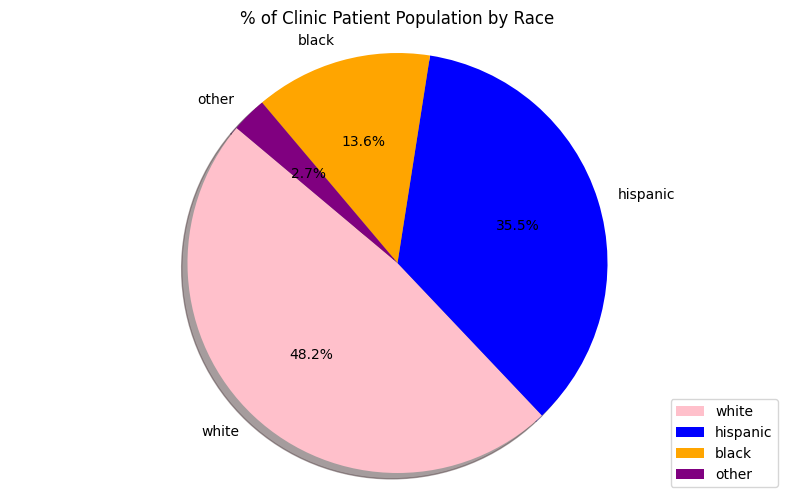

In [22]:
# Define custom colors using real color names
colors = ['pink', 'blue', 'orange', 'purple']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(race_counts, labels=race_counts.index, colors=colors[:len(race_counts)], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Clinic Patient Population by Race')
plt.legend(race_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

# 48.2% of patients were white, 35.5% of patients were hispanic, 13.6% of patients were black, and 2.7% were other races 

In [23]:
# Confirm # of patients per sex
sex_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['sex'].value_counts()

# Shows the counts per sex (male vs female)
sex_counts

sex
Male      63
Female    47
Name: count, dtype: int64

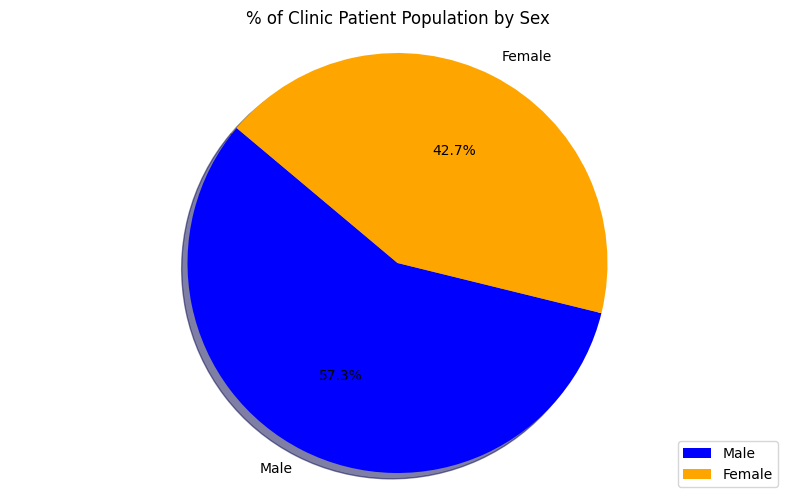

In [24]:
# Pie Chart - % of Clinic Patient Population by Sex
# Define custom colors using real color names
colors = ['Blue', 'Orange']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors[:len(sex_counts)], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Clinic Patient Population by Sex')
plt.legend(sex_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

# 42.7% of patient population are female, 57.3% of patient population are male
# There are more male patients than female patients 

In [25]:
# confirm # of patients per age group
age_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['age_group'].value_counts()

# shows the counts per age group
age_counts

age_group
50+      38
35-49    33
25-34    23
<25      16
Name: count, dtype: int64

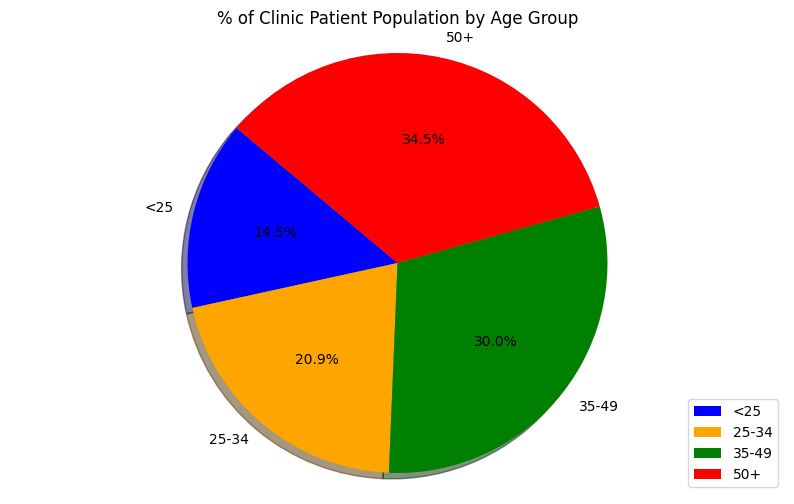

In [26]:
# Pie Chart - % of clinic patient population by Age Group
age_order = ['<25', '25-34', '35-49', '50+']
age_counts = cleaned_df['age_group'].value_counts().reindex(age_order)

# Define custom colors using real color names
colors = ['blue', 'orange', 'green', 'red']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(age_counts, labels=age_counts.index, colors=colors[:len(age_counts)], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Clinic Patient Population by Age Group')
plt.legend(age_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

# 34.5% of patient population are 50 years +
# 30% of patient population are between ages 35-49
# 20.9% of patient population are between ages 25-34
# 14.5% of patient population are less than 25 y/o

#### **Previous Opioid Use Analysis**
This section focuses on analyzing the duration and type of previous opioid use among the patients. The aim is to understand a patient’s previous exposure to opioids and how it can affect their current treatment strategies and outcomes. 

In [27]:
# confirm # of patients in previous opioid use category
previous_opioid_use_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['previous_opioid_use'].value_counts()

# shows the counts for previous opioid use category
previous_opioid_use_counts

previous_opioid_use
morphine     47
oxycodone    46
heroin       11
fentanyl      6
Name: count, dtype: int64

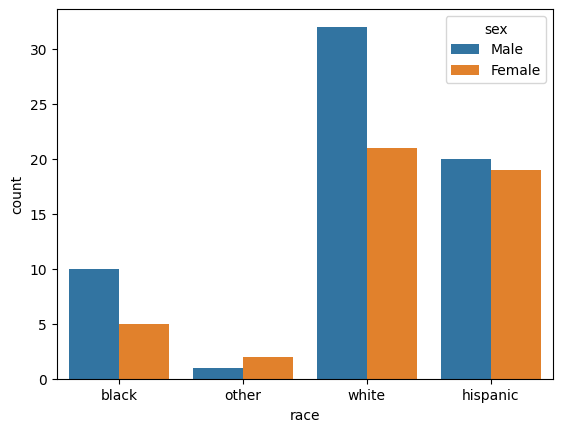

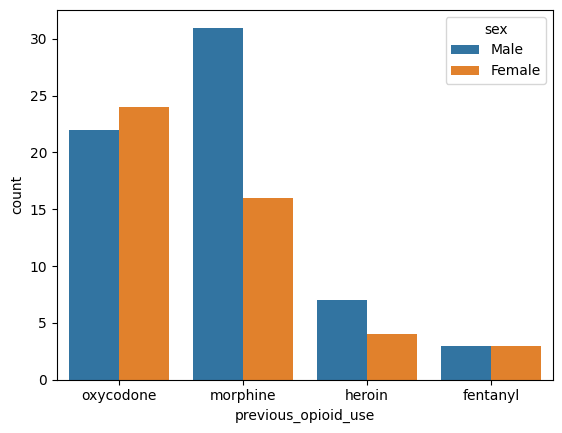

In [28]:
# create and display count plots for the "race" and "previous_opioid_use" columns, with bars colored by the "sex" column
totalCleandata= len(cleaned_df)
columns = ["race","previous_opioid_use"]
for i in columns:

    ax1 = sns.countplot(data=cleaned_df,x= i,hue="sex", hue_order=["Male", "Female"])
    
    plt.show()

# As shown previously, there are more male than females in every race category except for other race
# Most patients previously used morphine or oxycocdone before starting methadone treatment program 

#### **Treatment Analysis**
This section focuses on analyzing the dosage among the patients. The objective is to evaluate how different dosage levels are distributed across the dataset. 

In [29]:
# confirm # of patients in each dose category
dose_category_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['dose_category'].value_counts()

# shows the counts for each dose category
dose_category_counts

dose_category
Low Dose (<45mg)           64
Moderate Dose (50-80mg)    31
High Dose (>80mg)          15
Name: count, dtype: int64

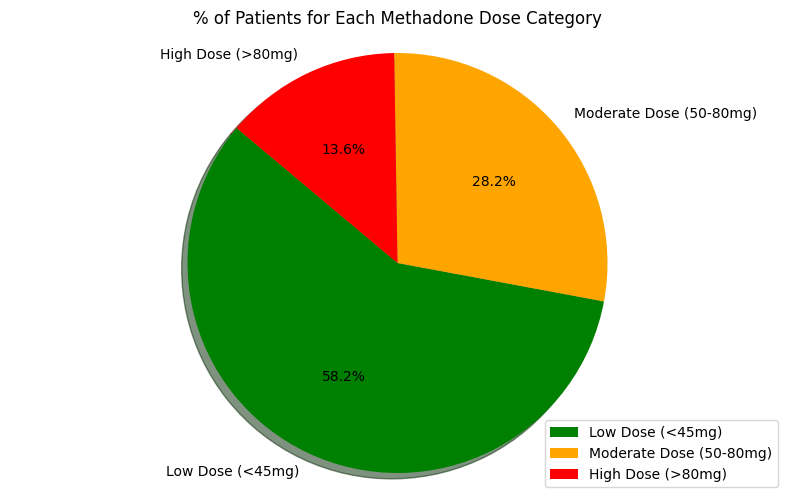

In [30]:
# Pie Chart - % of patients who took high-dose, moderate-dose, low-dose methadone

# Define custom colors
colors = ['green', 'orange', 'red']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(dose_category_counts, labels=dose_category_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Patients for Each Methadone Dose Category')
plt.legend(dose_category_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

# 58.2% of patients were prescribed low-dose methadone ( < 45mg)
# 28.2% of patients were prescribed moderate-dose methadone ( 50-80mg)
# 13.6% of patients were prescribed high-dose methadone ( > 80mg)

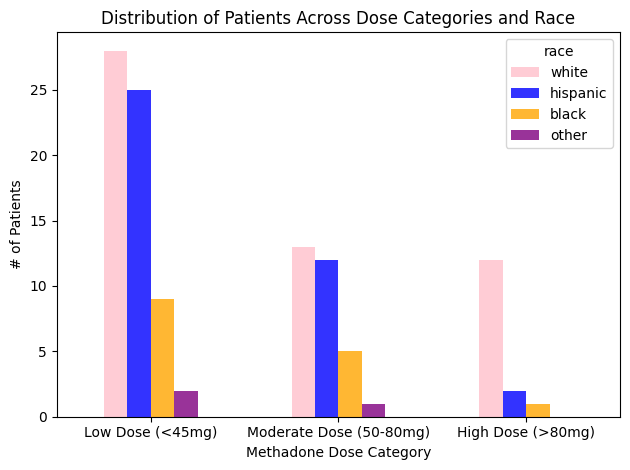

In [31]:
# Original order of races 
race_order = ['white', 'hispanic', 'black', 'other']

# Colors 
race_colors = ['pink', 'blue', 'orange', 'purple']

# Unstack plot to show the distribution of patients across dose categories and race
dose_race_distribution = pd.crosstab(cleaned_df['dose_category'], cleaned_df['race'])

# Keep original order of races
dose_race_distribution = dose_race_distribution.reindex(columns=race_order)

# pd.crosstab() is a function used to compute a cross-tabulation (also known as a contingency table) of two or more factors 
# this helps analyze relationship between categorical variables by showing the frequency distribution 

# Plot and customize
dose_race_distribution.plot(kind='bar', stacked=False, alpha=0.8, color= race_colors)
plt.title('Distribution of Patients Across Dose Categories and Race')
plt.xlabel('Methadone Dose Category')
plt.ylabel('# of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Most patients were prescribed low-dose methadone
# Majority of patients across all methadone dose categories were of white race

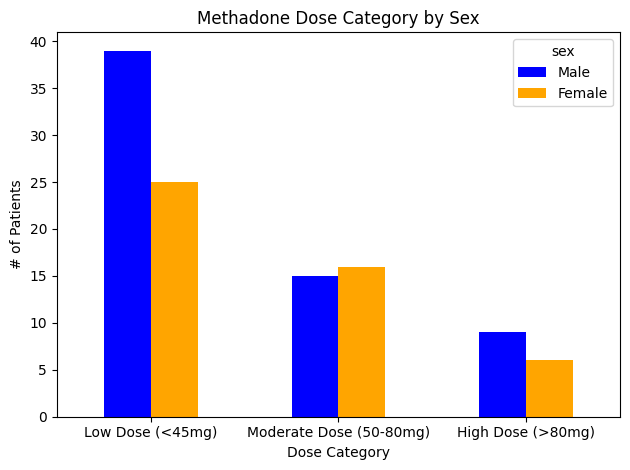

In [32]:
# Unstack plot showing methadone dose category depending on sex
(cleaned_df.groupby(['dose_category','sex'], observed=False)
.size()
.unstack()
.reindex(columns=['Male','Female'])
.plot(kind='bar', stacked=False, color=['blue','orange']))

plt.title('Methadone Dose Category by Sex' )
plt.xticks(rotation = 4)
plt.xlabel('Dose Category')
plt.ylabel('# of Patients')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Methadone was evenly prescribed between male and females for moderate-dose category

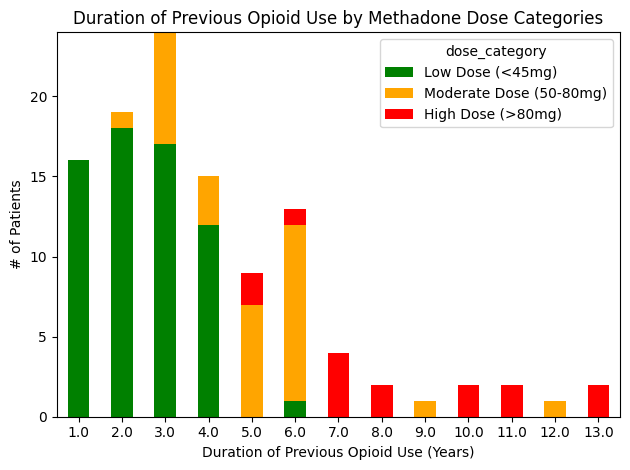

In [33]:
# Stack plot showing # of patients in different methadone dose categories by duration of previous opioid use 
(cleaned_df.groupby(['duration_previous_opioid_use',"dose_category"], observed=False)
.size()
.unstack()
.reindex(columns=['Low Dose (<45mg)', 'Moderate Dose (50-80mg)', 'High Dose (>80mg)'])
.plot(kind='bar', stacked=True, color=['green', 'orange', 'red']))

plt.title('Duration of Previous Opioid Use by Methadone Dose Categories' )
plt.xticks(rotation = 4)
plt.xlabel('Duration of Previous Opioid Use (Years)')
plt.ylabel('# of Patients')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Patients with previous opioid use for less duration of time were prescribed low-dose methadone 
# Patients with previous opioid use for a longer duration of time were prescribed higher doses of methadone

#### **Outcomes Analysis**
This section focuses on evaluating the effectiveness of the methadone treatment program by analyzing the methadone dosage levels and patient retention rates over time. These findings will provide insights to guide treatment plans, identify optimal dosage levels and highlight areas of improvement. 

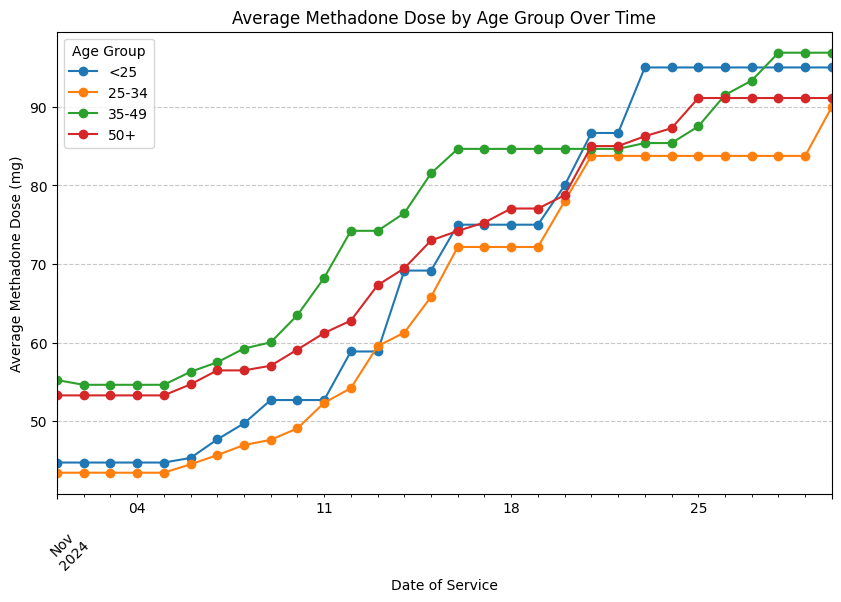

In [34]:
# Convert date_of_service to datetime for time-based analysis
df['date_of_service'] = pd.to_datetime(df['date_of_service'])

# Methadone Dose vs Age Group (Average Over Time)
age_group_dose_over_time = df.groupby([df['date_of_service'], 'age_group'])['methadone_dose_mg'].mean().unstack()

# Plot the line chart for methadone dose over time by age group
age_group_dose_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Average Methadone Dose by Age Group Over Time')
plt.xlabel('Date of Service')
plt.ylabel('Average Methadone Dose (mg)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

# The average methadone dose increased over time for all age-groups 

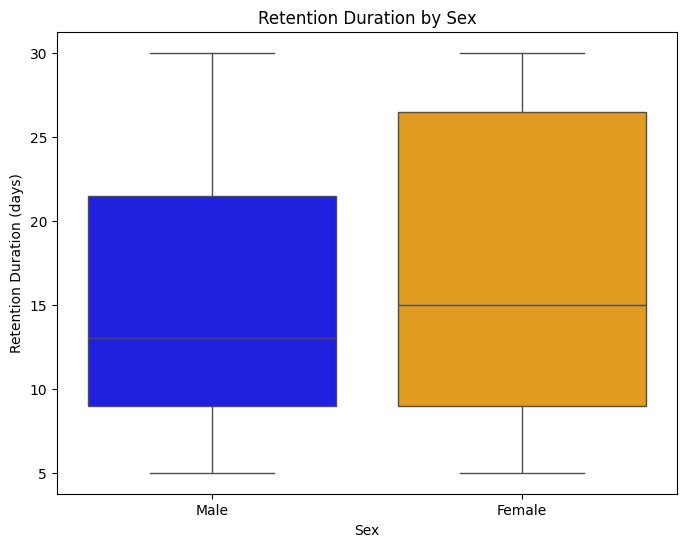

In [35]:
# Box Plot: Retention duration by sex
sex_order = ["Male", "Female"]
sex_palette = {"Male": "blue", "Female": "orange"}

plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='total_days_attended', data=cleaned_df, order=sex_order, hue='sex', palette=sex_palette)
plt.title('Retention Duration by Sex')
plt.xlabel('Sex')
plt.ylabel('Retention Duration (days)')
plt.show()

# Women, on average, stayed in the program longer than men.
# No outliers (since we created our own dataset)

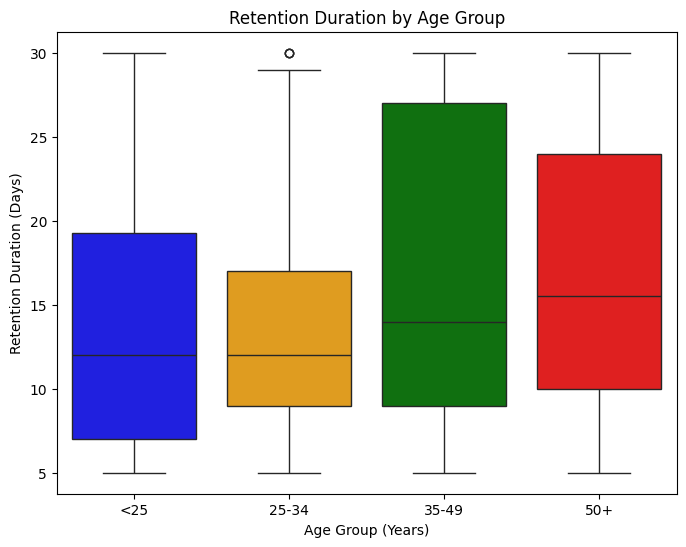

In [36]:
# Box Plot: Retention Duration by Age Group

# Define age order
age_order = ['<25', '25-34', '35-49', '50+']

# Define custom colors using real color names
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8,6))
sns.boxplot(x='age_group', y='total_days_attended', data=cleaned_df, order=age_order, palette=colors)
plt.title('Retention Duration by Age Group')
plt.xlabel('Age Group (Years)')
plt.ylabel('Retention Duration (Days)')
plt.show()

# Older patients have higher retention duration
# One outlier: There was 1 patient who had a 100% retention rate from the age group 25-34.

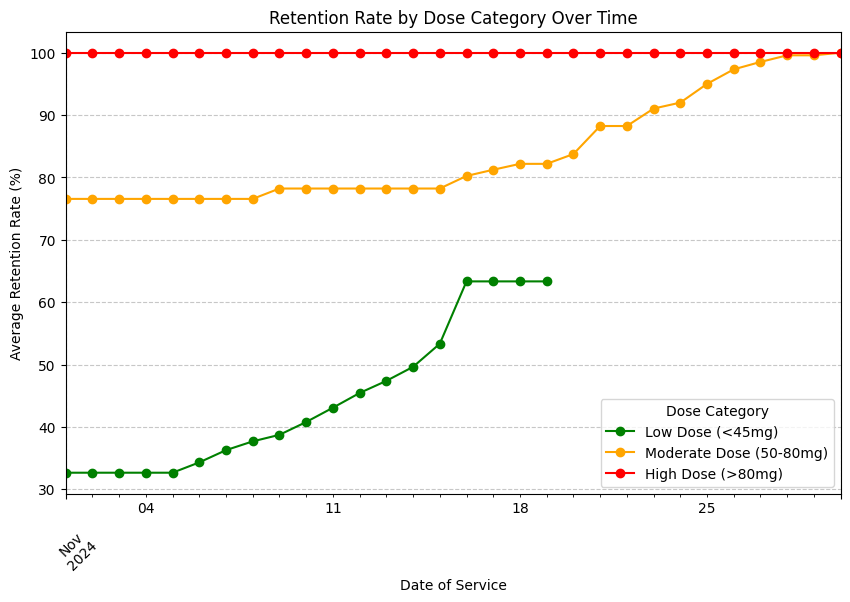

In [37]:
# Retention Rate Across Dose Categories Over Time
dose_category_retention_over_time = (df.groupby([df['date_of_service'], 'dose_category'])['retention_rate']
.mean()
.unstack()
.reindex(columns=['Low Dose (<45mg)', 'Moderate Dose (50-80mg)', 'High Dose (>80mg)']))


# Plot the line chart for retention rate over time by dose category
dose_category_retention_over_time.plot(kind='line', marker='o', figsize=(10, 6), color=['green', 'orange', 'red'], title='Retention Rate by Dose Category Over Time')
plt.xlabel('Date of Service')
plt.ylabel('Average Retention Rate (%)')
plt.legend(title='Dose Category')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Patients who started with a low-dose methadone dose were not able to be retained in treatment program 
# Patients who started with moderate-dose methadone had a retention rate > 50% & increased over time as doses increased
# Patients who started with a high-dose methadone had a retention rate of 100% 

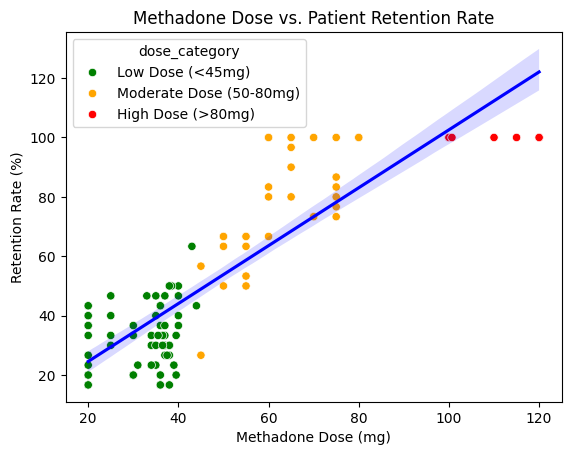

In [38]:
# Scatter Plot (e.g. correlation between methadone dose and patient retention rate)
plt.title('Methadone Dose vs. Patient Retention Rate')
 
dose_palette = {
    'Low Dose (<45mg)': 'green',
    'Moderate Dose (50-80mg)': 'orange',
    'High Dose (>80mg)': 'red'}

# Create a scatter plot
sns.scatterplot(data=cleaned_df, x='methadone_dose_mg', hue= "dose_category", palette=dose_palette , y='retention_rate')
 
# Add a regression line to the scatter plot
sns.regplot(data=cleaned_df, x='methadone_dose_mg', y='retention_rate', scatter=False, color='blue')

# Customize 
plt.xlabel('Methadone Dose (mg)')
plt.ylabel('Retention Rate (%)')
plt.show()

# Scatter plot shows a positive association between methadone dose & patient retention rate
# Higher the dose of methadone, better the retention rate

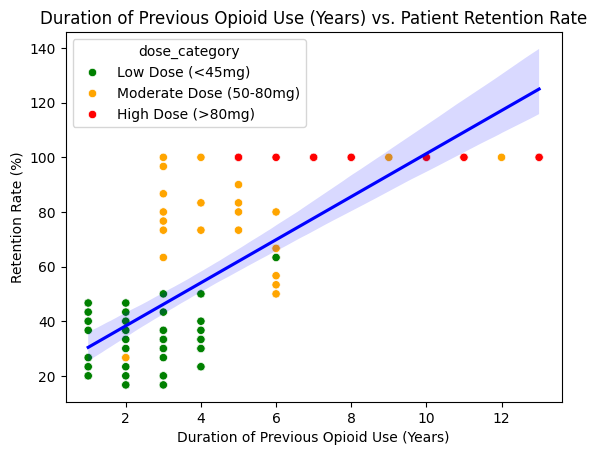

In [39]:
# Scatter Plot (e.g. correlation between duration of previous opioid use(years) and patient retention rate)
plt.title('Duration of Previous Opioid Use (Years) vs. Patient Retention Rate')

dose_palette = {
    'Low Dose (<45mg)': 'green',
    'Moderate Dose (50-80mg)': 'orange',
    'High Dose (>80mg)': 'red'}

# Create a scatter plot
sns.scatterplot(data=cleaned_df, x='duration_previous_opioid_use', hue= "dose_category", palette=dose_palette , y='retention_rate')
 
# Add a regression line to the scatter plot
sns.regplot(data=cleaned_df, x='duration_previous_opioid_use', y='retention_rate', scatter=False, color='blue')

# Customize 
plt.xlabel('Duration of Previous Opioid Use (Years)')
plt.ylabel('Retention Rate (%)')
plt.show()

# Scatter plot shows a positive correlation between duration of previous opioid use & patient retention rate
# Longer duration of previous opioid use renders a higher dose of methadone which ultimately yields better retention rates

## Limitations

1. Very time consuming manually creating a dataset
2. Need a larger and more diverse patient population (e.g. more patients needed of various ages and races and previous opioid use)
3. Need a longer timeframe (e.g. collect data over 6 months to years)
4. Difficulty plotting graphs using time / dates of services (requires a lot of cleaning and manipulation)

# Conclusion

1. Higher doses of methadone are associated with improved treatment retention rates.
2. Duration of previous opioid use directly reflects the methadone-dose category. The longer the patient was using an opioid, the higher the methadone dose that the patient received which strengthens our conclusion that higher methadone doses yield better retention rates.
3. Older patients showed to have higher retention rates suggesting a need to tailor the methadone treatment program to retain the younger age population. However, more data is necessary.
4. On average, females had a slightly better retention rate than males; however, no significant difference was seen.
5. The average methadone dose that patients were prescribed in each age group were not sufficient to maintain withdrawal symptoms as the average methadone dose in all age groups increased over time.
6.  The highest number of patients (64 out of 110 patients) were prescribed low dose methadone (<45mg) suggesting that it is the most commonly prescribed methadone dose. This reflects a cautious approach used by prescribers to initial dosing. Since higher doses of methadone are associated with better retention rate, a change in prescribing pattern (e.g. higher dosing of methadone) may be required.
7. More data is needed in terms of race and its association with previous opioid use, methadone dose categories, and patient retention rate.

#### References
- Trends in the Rate of Opioid-Related Hospitalizations. (n.d.). Accessed November 1, 2024. https://www.ahrq.gov/opioids/map/index.html
- Methadone. (n.d.). Accessed November 1, 2024. https://www.samhsa.gov/medications-substance-use-disorders/medications-counseling-related-conditions/methadone